In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import io
titanic_data=pd.read_csv('../input/titanic/train.csv')

In [2]:
titanic_data.shape

(891, 12)

In [3]:
type(titanic_data)

pandas.core.frame.DataFrame

In [4]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_data.iloc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
#每一列叫做series,series是1D labelled numpy array.
#DataFrame是2D labelled array, whose columns are series.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Building DataFrame from Scrratch
#Use dictionary of lists
data={
    'Weekly':['Sunday','Tuesday','Friday'],
    'City':['Washington DC','New York','Dallas'],
    'Visitors':['99','199','299']
}
dataframe=pd.DataFrame(data)
dataframe

,Weekly,City,Visitors
0,Sunday,Washington DC,99
1,Tuesday,New York,199
2,Friday,Dallas,299


In [10]:
#Build Dataframes by comfiring lists
City=['Washington DC','New York','Dallas']
Weekday=['Sunday','Tuesday','Friday']
Visitors=['99','199','299']

list_labels=['City','Weekday','Visitors']
list_cols=[City,Weekday,Visitors]

dataframe2=list(zip(list_labels,list_cols))

#先转换成dict,再转换成pd.dataframe
dataframe2=dict(dataframe2)
dataframe2=pd.DataFrame(dataframe2)
dataframe2

,City,Weekday,Visitors
0,Washington DC,Sunday,99
1,New York,Tuesday,199
2,Dallas,Friday,299


In [11]:
dataframe2['location']='null'
dataframe2

,City,Weekday,Visitors,location
0,Washington DC,Sunday,99,null
1,New York,Tuesday,199,null
2,Dallas,Friday,299,null


In [12]:
# not restricted to numbers
heights=[11,22,33,44,55,66]
data={'height':heights,'sex':'F'}
dataframe3=pd.DataFrame(data)
print(dataframe3)

   height sex
0      11   F
1      22   F
2      33   F
3      44   F
4      55   F
5      66   F


In [13]:
#改index
dataframe3.columns=['test','Sex']
dataframe3.index=['1','2','3','4','5','6']
print(dataframe3)

   test Sex
1    11   F
2    22   F
3    33   F
4    44   F
5    55   F
6    66   F


> Plotting withPandas

In [14]:
import matplotlib.pyplot as plt

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data_age=titanic_data['Age']
type(titanic_data_age)

pandas.core.series.Series

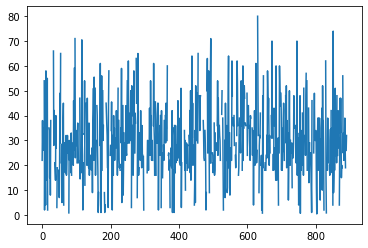

In [17]:
plt.plot(titanic_data_age)
plt.show()

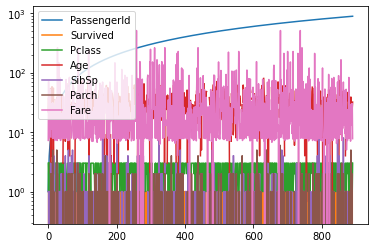

In [18]:
titanic_data.plot()
plt.yscale('log')
plt.show()

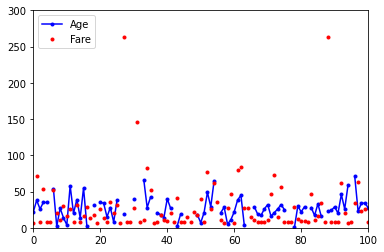

In [19]:
titanic_data['Age'].plot(color='b',style='.-',legend=True)
titanic_data['Fare'].plot(color='r',style='.',legend=True)
plt.axis((0,100,0,300))
plt.show()

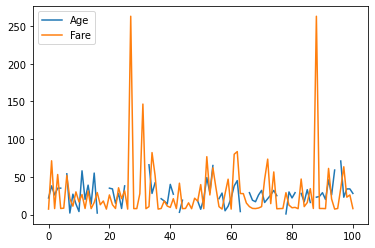

In [20]:
fig=titanic_data.loc[0:100,['Age','Fare']].plot()

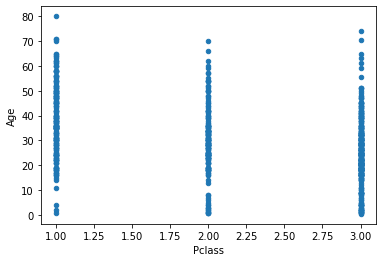

In [21]:
titanic_data.plot(x='Pclass',y='Age',kind='scatter')
plt.show()

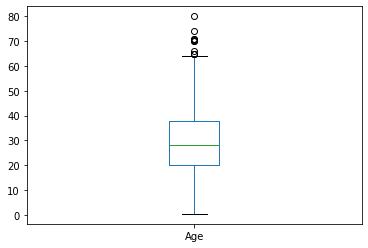

In [22]:
titanic_data.plot(y='Age',kind='box')
plt.show()

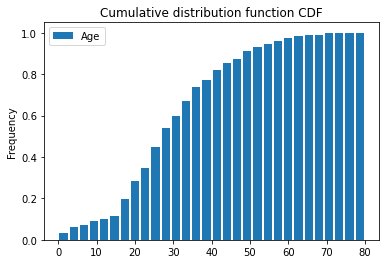

In [28]:
#看增长快还是缓慢。
titanic_data.plot(y='Age',kind='hist',bins=30, range=(0,80),cumulative=True,rwidth=0.8,density=True)
plt.title('Cumulative distribution function CDF')
plt.show()

# Statistical Exploratory Data Analysis EDA

In [24]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
titanic_data['Age'].count()

714

In [30]:
titanic_data['Age'].mean()

29.69911764705882

In [31]:
titanic_data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [32]:
titanic_data.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [34]:
q=0.5
titanic_data.quantile(q)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 0.5, dtype: float64

In [35]:
q=[0.25,0.75]
titanic_data.quantile(q)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.25,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
0.75,668.5,1.0,3.0,38.000,1.0,0.0,31.0000


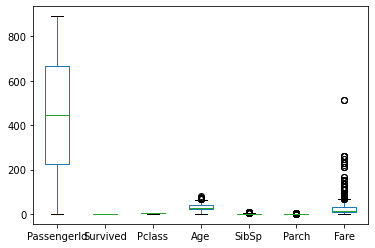

In [36]:
#（box以外）离散的点是outlier
titanic_data.plot(kind='box')

In [38]:
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [40]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
#提取s港口登陆的人
indices=titanic_data['Embarked']=='S'
Embarked_S=titanic_data.loc[indices,:]

In [45]:
Embarked_S['Embarked'].unique()

array(['S'], dtype=object)

In [46]:
Embarked_S.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S


#  **Additional part for visual EDA: all Data**

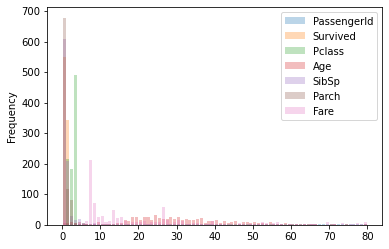

In [47]:
titanic_data.plot(kind='hist',bins=80,rwidth=0.8,alpha=0.3,range=(0,80))
plt.show()

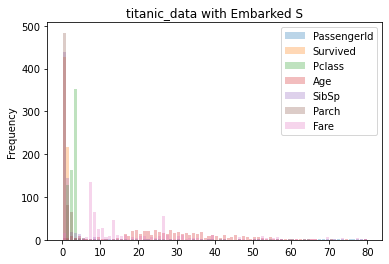

In [56]:
Embarked_S.plot(kind='hist',bins=80,rwidth=0.8,alpha=0.3,range=(0,80))
plt.title('titanic_data with Embarked S')
plt.show()

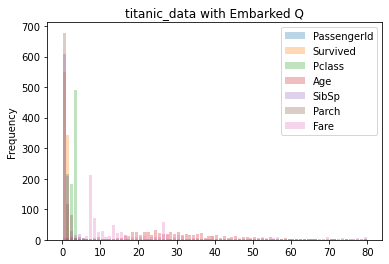

In [58]:
indices=titanic_data['Embarked']=='Q'
Embarked_Q=titanic_data.loc[indices,:]
Embarked_Q.plot(kind='hist',bins=80,rwidth=0.8,alpha=0.3,range=(0,80))
plt.title('titanic_data with Embarked Q')
plt.show()

In [55]:
Embarked_Q.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Q
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Q
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Q
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Q
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Q


In [59]:
titanic_data['Pclass'].unique()

array([3, 1, 2])

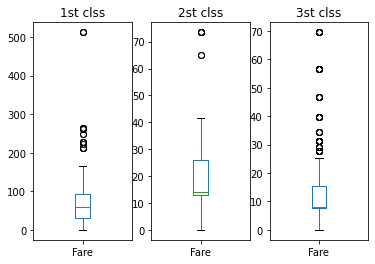

In [63]:
#一次画三个图来比较
fig,axes=plt.subplots(nrows=1,ncols=3)
titanic_data.loc[titanic_data['Pclass']==1].plot(ax=axes[0],y='Fare',kind='box',title='1st clss')
titanic_data.loc[titanic_data['Pclass']==2].plot(ax=axes[1],y='Fare',kind='box',title='2st clss')
titanic_data.loc[titanic_data['Pclass']==3].plot(ax=axes[2],y='Fare',kind='box',title='3st clss')
plt.show()

# Indexing Time Series

ISO 8601 format:yyyy-mm-dd hh:mm:ss
Pandas data frame能提取不同时间段的/年/月/日/时间的交易记录

In [66]:
Date=['2019-08-01 08:00:00','2019-08-15 12:00:00','2019-08-30 20:00:00',
      '2019-09-01 08:01:00','2019-09-15 12:01:00','2019-09-30 20:01:00',
      '2019-10-01 08:02:00','2019-10-15 12:02:00','2019-10-30 20:02:00']
Company=['Apple','Microsoft','Amazon',
         'Apple','Microsoft','Amazon',
         'Apple','Microsoft','Amazon',
        ]
Product=['iPhone','XBox','Mop',
        'iPad','Surface','Decoration',
        'MacPro','Office365','Pen']
Units=['1','1','2',
      '2','1','1',
      '1','6','10',]
data={'Date':Date, 'Company':Company,'Product':Product,'Units':Units}
df=pd.DataFrame(data)
df

,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iPhone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-09-01 08:01:00,Apple,iPad,2
4,2019-09-15 12:01:00,Microsoft,Surface,1
5,2019-09-30 20:01:00,Amazon,Decoration,1
6,2019-10-01 08:02:00,Apple,MacPro,1
7,2019-10-15 12:02:00,Microsoft,Office365,6
8,2019-10-30 20:02:00,Amazon,Pen,10


In [67]:
df.to_csv('filename.csv')

In [71]:
sales=pd.read_csv('filename.csv')
sales

,Unnamed: 0,Date,Company,Product,Units
0,0,2019-08-01 08:00:00,Apple,iPhone,1
1,1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2,2019-08-30 20:00:00,Amazon,Mop,2
3,3,2019-09-01 08:01:00,Apple,iPad,2
4,4,2019-09-15 12:01:00,Microsoft,Surface,1
5,5,2019-09-30 20:01:00,Amazon,Decoration,1
6,6,2019-10-01 08:02:00,Apple,MacPro,1
7,7,2019-10-15 12:02:00,Microsoft,Office365,6
8,8,2019-10-30 20:02:00,Amazon,Pen,10


In [73]:
sales=pd.read_csv('filename.csv',parse_dates=True,index_col='Date')
sales

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-08-01 08:00:00,0,Apple,iPhone,1
2019-08-15 12:00:00,1,Microsoft,XBox,1
2019-08-30 20:00:00,2,Amazon,Mop,2
2019-09-01 08:01:00,3,Apple,iPad,2
2019-09-15 12:01:00,4,Microsoft,Surface,1
2019-09-30 20:01:00,5,Amazon,Decoration,1
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-15 12:02:00,7,Microsoft,Office365,6
2019-10-30 20:02:00,8,Amazon,Pen,10


In [76]:
sales.drop(columns='Unnamed: 0')

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [77]:
sales.loc['2019-08-01 08:00:00','Company']

'Apple'

In [78]:
sales.loc['2019-10']

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-15 12:02:00,7,Microsoft,Office365,6
2019-10-30 20:02:00,8,Amazon,Pen,10


In [79]:
sales.loc['October,2019']

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-15 12:02:00,7,Microsoft,Office365,6
2019-10-30 20:02:00,8,Amazon,Pen,10


In [81]:
sales.loc['2019-Oct-1']

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-10-01 08:02:00,6,Apple,MacPro,1


In [82]:
sales.loc['2019']

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-08-01 08:00:00,0,Apple,iPhone,1
2019-08-15 12:00:00,1,Microsoft,XBox,1
2019-08-30 20:00:00,2,Amazon,Mop,2
2019-09-01 08:01:00,3,Apple,iPad,2
2019-09-15 12:01:00,4,Microsoft,Surface,1
2019-09-30 20:01:00,5,Amazon,Decoration,1
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-15 12:02:00,7,Microsoft,Office365,6
2019-10-30 20:02:00,8,Amazon,Pen,10


In [83]:
sales.loc['2019-09-01':'2019-10-31']

,Unnamed: 0,Company,Product,Units
Date,,,,
2019-09-01 08:01:00,3,Apple,iPad,2
2019-09-15 12:01:00,4,Microsoft,Surface,1
2019-09-30 20:01:00,5,Amazon,Decoration,1
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-15 12:02:00,7,Microsoft,Office365,6
2019-10-30 20:02:00,8,Amazon,Pen,10


In [84]:
time=pd.to_datetime(['2019-10-01 08:02','2019-10-02 20:00','2019-10-03 20:00','2019-10-15 12:02'])
time

DatetimeIndex(['2019-10-01 08:02:00', '2019-10-02 20:00:00',
               '2019-10-03 20:00:00', '2019-10-15 12:02:00'],
              dtype='datetime64[ns]', freq=None)

In [85]:
sales.reindex(time)

,Unnamed: 0,Company,Product,Units
2019-10-01 08:02:00,6.0,Apple,MacPro,1.0
2019-10-02 20:00:00,NaN,NaN,NaN,NaN
2019-10-03 20:00:00,NaN,NaN,NaN,NaN
2019-10-15 12:02:00,7.0,Microsoft,Office365,6.0


In [87]:
#backward fill
sales.reindex(time,method='bfill')

,Unnamed: 0,Company,Product,Units
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-02 20:00:00,7,Microsoft,Office365,6
2019-10-03 20:00:00,7,Microsoft,Office365,6
2019-10-15 12:02:00,7,Microsoft,Office365,6


In [88]:
#forward fill
sales.reindex(time,method='ffill')

,Unnamed: 0,Company,Product,Units
2019-10-01 08:02:00,6,Apple,MacPro,1
2019-10-02 20:00:00,6,Apple,MacPro,1
2019-10-03 20:00:00,6,Apple,MacPro,1
2019-10-15 12:02:00,7,Microsoft,Office365,6


# Resampling Time Series Data

In [100]:
sales=pd.read_csv('filename.csv',parse_dates=True,index_col='Date')
sales=sales.drop(columns='Unnamed: 0')

In [106]:
#D是天的意思
daily_mean=sales.resample('D').mean()
daily_mean.head(5)

,Units
Date,
2019-08-01,1.0
2019-08-02,NaN
2019-08-03,NaN
2019-08-04,NaN
2019-08-05,NaN


In [110]:
#平均每个月
daily_mean=sales.resample('M').mean()
daily_mean.head(5)

,Units
Date,
2019-08-31,1.333333
2019-09-30,1.333333
2019-10-31,5.666667


In [111]:
print(daily_mean.loc['2019-10-31'])

Units    5.666667
Name: 2019-10-31 00:00:00, dtype: float64


In [112]:
print(sales.loc['2019-10','Units'])

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64


In [113]:
sales.resample('M').sum()

,Units
Date,
2019-08-31,4
2019-09-30,4
2019-10-31,17


In [114]:
sales.resample('M').sum().max()

Units    17
dtype: int64

In [115]:
#W是week的意思，每一周结算一次
sales.resample('W').count()

,Company,Product,Units
Date,,,
2019-08-04,1,1,1
2019-08-11,0,0,0
2019-08-18,1,1,1
2019-08-25,0,0,0
2019-09-01,2,2,2
2019-09-08,0,0,0
2019-09-15,1,1,1
2019-09-22,0,0,0
2019-09-29,0,0,0


In [119]:
sales.loc[:,'Units'].resample('6W').sum()

Date
2019-08-04     1
2019-09-15     6
2019-10-27     8
2019-12-08    10
Freq: 6W-SUN, Name: Units, dtype: int64

In [120]:
one_day=sales.loc['2019-10-01':'2019-10-30','Units']
one_day

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [122]:
one_day.resample('4H').first().interpolate('linear')

Date
2019-10-01 08:00:00     1.000000
2019-10-01 12:00:00     1.058824
2019-10-01 16:00:00     1.117647
2019-10-01 20:00:00     1.176471
2019-10-02 00:00:00     1.235294
                         ...    
2019-10-30 04:00:00     9.826087
2019-10-30 08:00:00     9.869565
2019-10-30 12:00:00     9.913043
2019-10-30 16:00:00     9.956522
2019-10-30 20:00:00    10.000000
Freq: 4H, Name: Units, Length: 178, dtype: float64

# Manipulating Time Series Data

In [131]:
sales['Company'].str.upper()

Date
2019-08-01 08:00:00        APPLE
2019-08-15 12:00:00    MICROSOFT
2019-08-30 20:00:00       AMAZON
2019-09-01 08:01:00        APPLE
2019-09-15 12:01:00    MICROSOFT
2019-09-30 20:01:00       AMAZON
2019-10-01 08:02:00        APPLE
2019-10-15 12:02:00    MICROSOFT
2019-10-30 20:02:00       AMAZON
Name: Company, dtype: object

In [125]:
# Substring Match
sales['Product'].str.contains('i')

Date
2019-08-01 08:00:00     True
2019-08-15 12:00:00    False
2019-08-30 20:00:00    False
2019-09-01 08:01:00     True
2019-09-15 12:01:00    False
2019-09-30 20:01:00     True
2019-10-01 08:02:00    False
2019-10-15 12:02:00     True
2019-10-30 20:02:00    False
Name: Product, dtype: bool

In [126]:
sales['Product'].str.contains('i').sum()

4

# Time Series Visualization

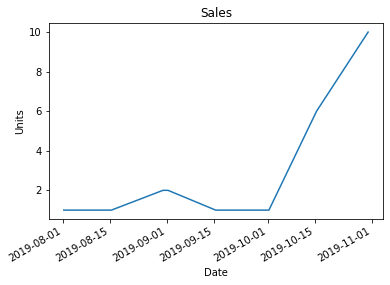

In [136]:
sales['Units'].plot(title='Sales')
plt.ylabel('Units')
plt.show()

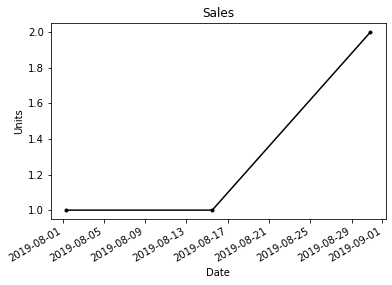

In [140]:
sales.loc['2019-08-01':'2019-08-31','Units'].plot(style='k.-',title='Sales')
plt.ylabel('Units')
plt.show()

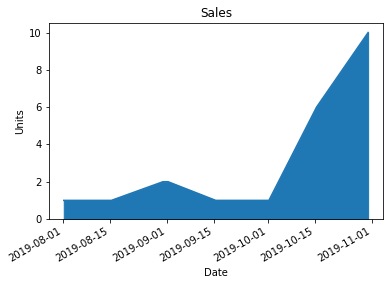

In [141]:
sales['Units'].plot(kind='area',title='Sales')
plt.ylabel('Units')
plt.show()

In [142]:
price=[999,300,10,1399,1299,99,2999,199,20]
sales['Price$']=price
sales

,Company,Product,Units,Price$
Date,,,,
2019-08-01 08:00:00,Apple,iPhone,1,999
2019-08-15 12:00:00,Microsoft,XBox,1,300
2019-08-30 20:00:00,Amazon,Mop,2,10
2019-09-01 08:01:00,Apple,iPad,2,1399
2019-09-15 12:01:00,Microsoft,Surface,1,1299
2019-09-30 20:01:00,Amazon,Decoration,1,99
2019-10-01 08:02:00,Apple,MacPro,1,2999
2019-10-15 12:02:00,Microsoft,Office365,6,199
2019-10-30 20:02:00,Amazon,Pen,10,20


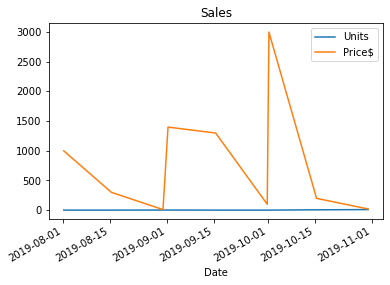

In [143]:
sales.loc['2019',['Units','Price$']].plot(title='Sales')
plt.show()

In [ ]:
sales.loc['2019',['Units','Price$']].plot(subplots=True)
plt.show()